In [2]:
#Ricardo Figueroa CU 112714
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from scipy.stats import norm
from sklearn import preprocessing, linear_model
from random import random
import requests
import csv
from sklearn.naive_bayes import MultinomialNB

In [3]:
#se leen datos del repositorio
CSV_URL = 'https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin.csv'
with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

In [4]:
#se incluyen los datos en data frame y se transforman en float
x = np.array([row[0] for row in my_list])
y = np.array([row[1] for row in my_list])
d = {'x' : x[1:], 'y' : y[1:]}
df = pd.DataFrame(d)
df = df.astype(float)

In [5]:
index=np.array([1 if random() < 0.75 else 0 for i in range(len(df))])

In [6]:
#se incluyen las variables en arreglos independientes, es necesario un reshape para que los datos puedan ser leidos por el fit
X_train=np.array(df[df.columns[0]])[index==1]
X_test=np.array(df[df.columns[0]])[index==0]
Y_train=np.array(df[df.columns[1]])[index==1]
Y_test=np.array(df[df.columns[1]])[index==0]
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)
X_test2 = X_test

In [8]:
#se declara la regresion, se ajustan los datos al modelo y se hacen predicciones
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Y_predict = regr.predict(X_test)

In [12]:
def SumaErrorCuad(YpredArray, Yarray):
    SumError = 0
    for i in range(0, len(YpredArray)):
        SumError = SumError + ((YpredArray[i]-Yarray[i])**2)
    return SumError

In [19]:
#Coeficientes
# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
intercept = regr.intercept_
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_predict, multioutput='raw_values'))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_predict))

('Coefficients: \n', array([[ 0.60690708]]), array([ 2.51791141]))
Mean squared error: 20.59
Variance score: 0.94


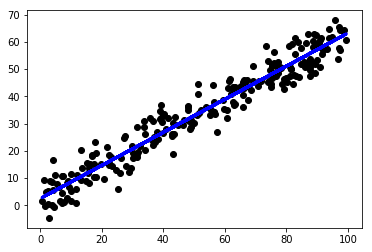

In [9]:
#graficas de modelo de regresion
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_predict, color='blue', linewidth=3)
plt.show()

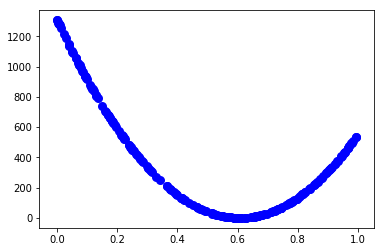

In [20]:
#graficas de error vs. coeficiente
error_array = []
b_array = []
for i in range(len(X_test2)):
    b = rd.uniform(0,1)
    y = b*X_test2 + intercept
    error_array.append(mean_squared_error(y, Y_predict, multioutput='raw_values'))
    b_array.append(b)
plt.scatter(b_array, error_array, color='blue', linewidth=3)
plt.show()